In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.spatial import ConvexHull

In [26]:
def point_in_hull(point, hull, tolerance=1e-6):
    return all(
        (np.dot(eq[:-1], point) + eq[-1] <= tolerance)
        for eq in hull.equations
    )

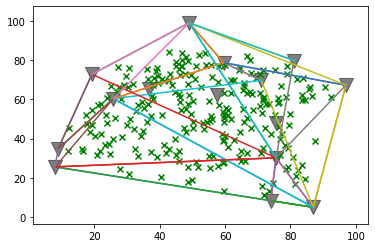

In [27]:
points = np.random.uniform(0, 100, (15, 3))
hull = ConvexHull(points)

#np.random.seed(1)
random_points = np.random.uniform(0, 100, (1000, 3))

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1])

plt.scatter(*points.T[:2], alpha=.5, color='k', s=200, marker='v')

for p in random_points:
    point_is_in_hull = point_in_hull(p, hull)
    marker = 'x' if point_is_in_hull else 'd'
    color = 'g' if point_is_in_hull else 'm'
    
    if not point_is_in_hull:
        continue
    plt.scatter(p[0], p[1], marker=marker, color=color)

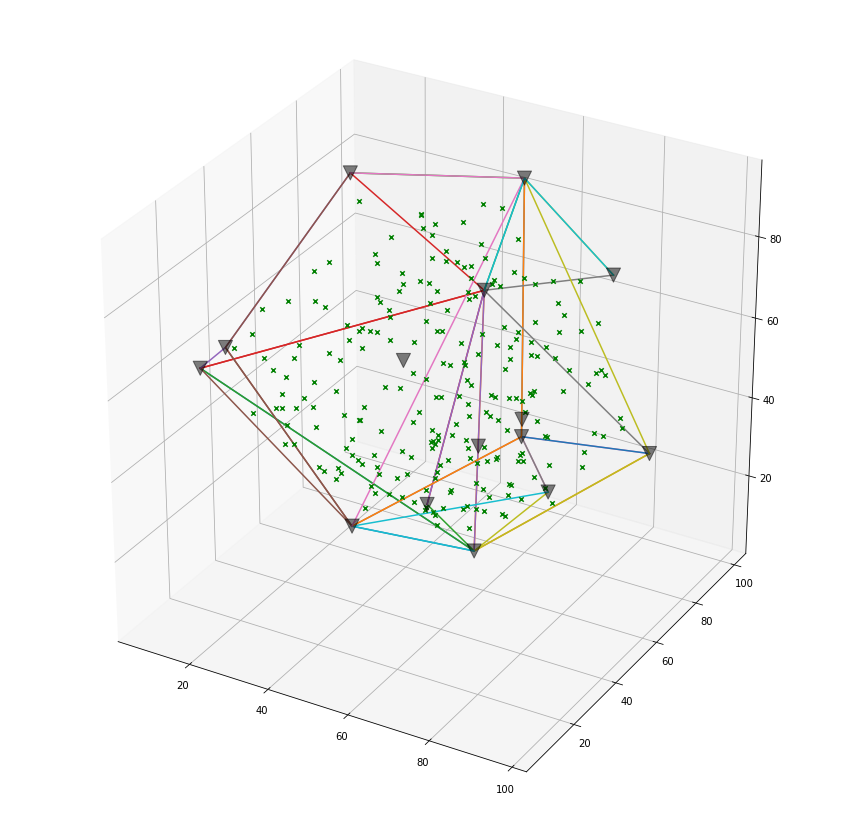

In [28]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2])
    
ax.scatter(*points.T, alpha=.5, color='k', s=200, marker='v')

for p in random_points:
    point_is_in_hull = point_in_hull(p, hull)
    marker = 'x' if point_is_in_hull else 'd'
    color = 'g' if point_is_in_hull else 'm'
    
    if not point_is_in_hull:
        continue
    ax.scatter(p[0], p[1], p[2], marker=marker, color=color)